In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
**********************************************************************
File "Classes.ipynb", line 308, in __main__.GP.plot_posterior
Failed example:
    data.cov[21,19]
Expected:
    0.005164173765261598
Got:
    0.005164173765261595
**********************************************************************
1 items had failures:
   1 of  20 in __main__.GP.plot_posterior
***Test Failed*** 1 failures.
TestResults(failed=1, attempted=302)
Time Taken: 29s


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
# data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


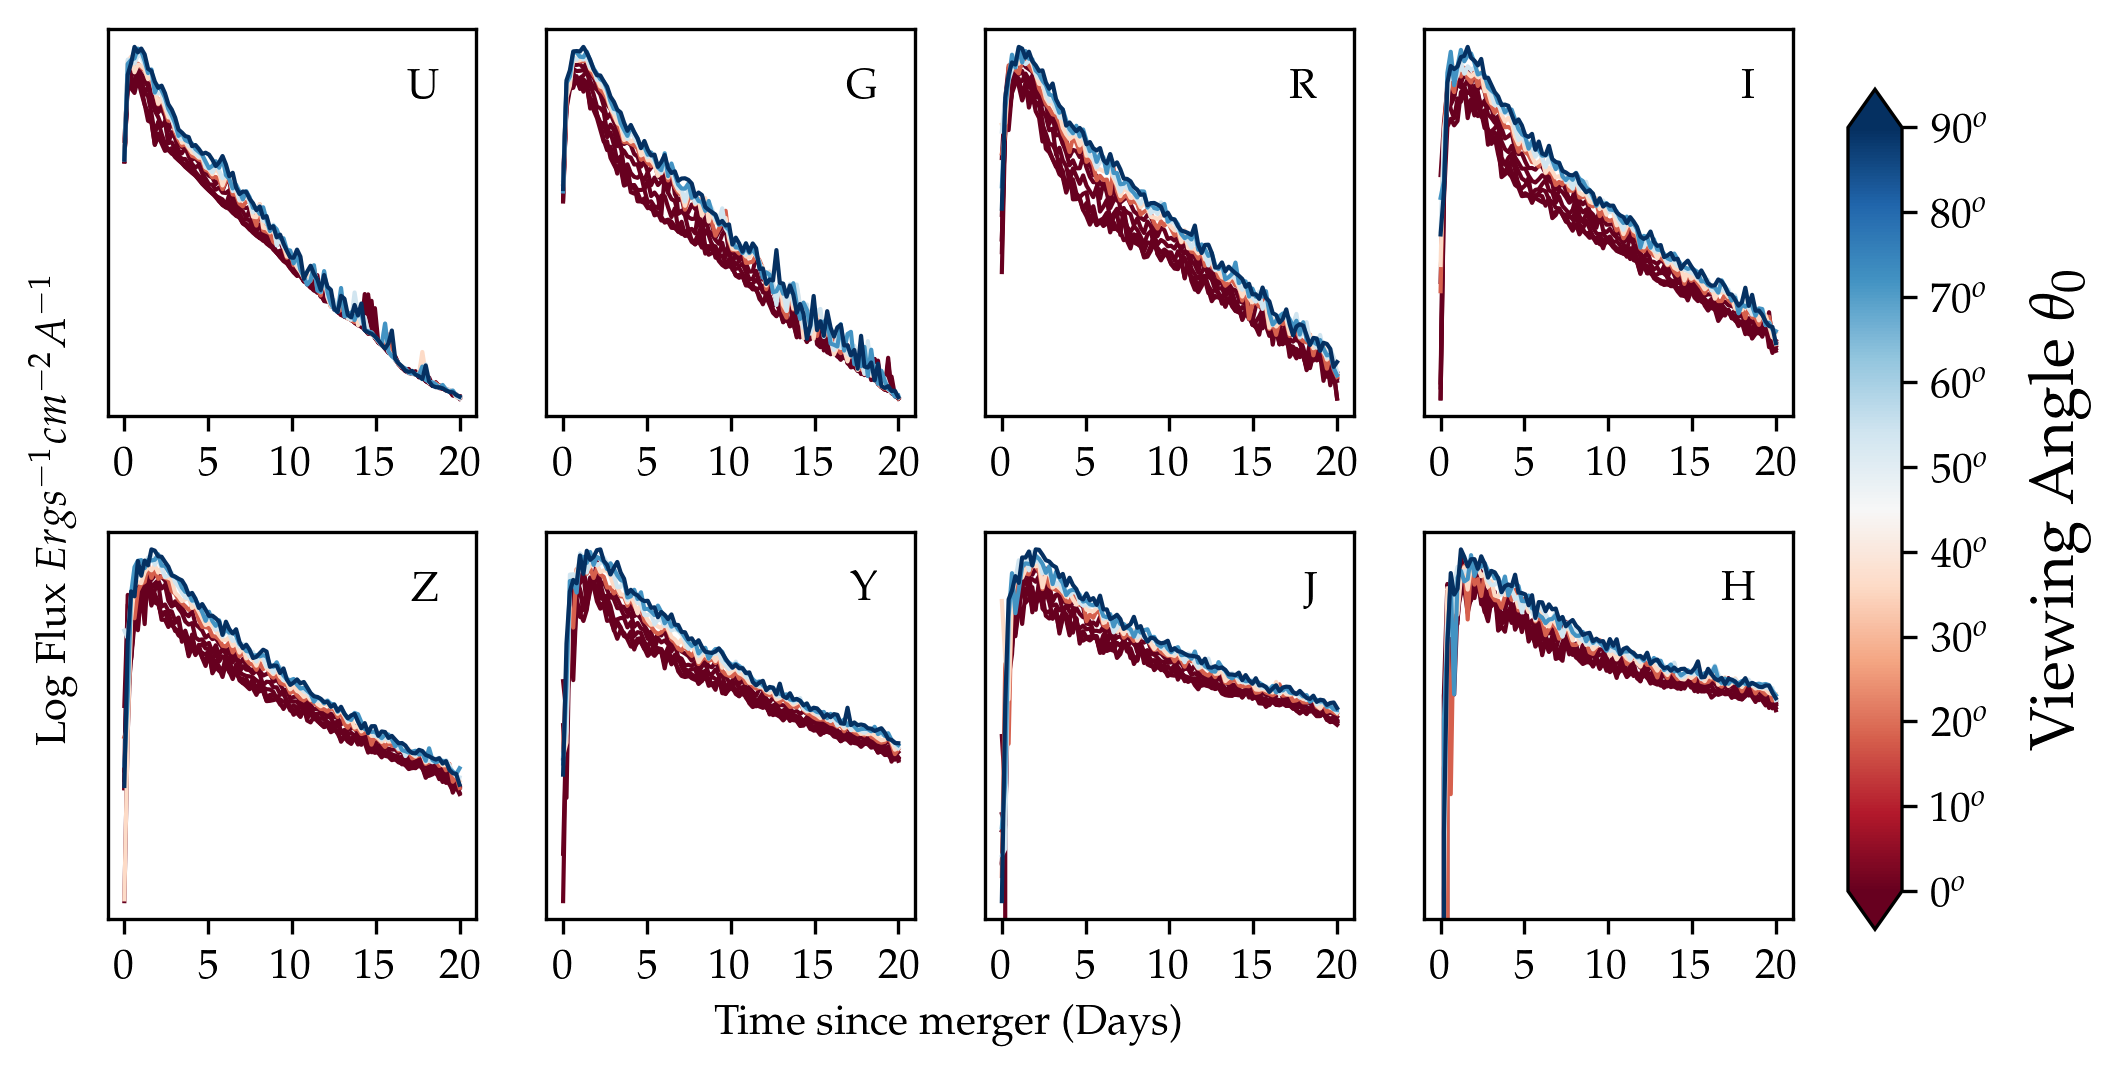

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range)
data.plot_viewingangle()

In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [45]
mejdyn_range = [0.01]
mejwind_range = [0.11]
wv = 900
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
gp.viewingangle

iobs              0         1         2         3         4         5  \
time_step                                                               
0          0.000008  0.000075  0.000068  0.000074  0.000002  0.000002   
1          0.000821  0.000162    0.0002   0.00032  0.000109  0.000424   
2          0.001215  0.000896    0.0011  0.001182  0.001163  0.000646   
3          0.002716  0.002916  0.001421  0.001165  0.002129  0.003567   
4          0.001977  0.002169  0.001102  0.002042  0.003423  0.002785   
...             ...       ...       ...       ...       ...       ...   
95         0.000024  0.000023  0.000023  0.000023  0.000022  0.000023   
96         0.000018  0.000019  0.000019  0.000019  0.000019  0.000019   
97         0.000016  0.000014  0.000015  0.000014  0.000016  0.000018   
98         0.000014  0.000014  0.000014  0.000016  0.000015  0.000016   
99         0.000013  0.000012  0.000013  0.000013  0.000013  0.000014   

iobs              6         7         8         9        10       time  
time_step                                                               
0          0.000002  0.000001  0.000001  0.000001  0.000001   0.000000  
1          0.000436   0.00078  0.000874  0.002856  0.000297   0.202020  
2          0.001896  0.001691  0.002209  0.001234   0.00303   0.404040  
3          0.003088  0.003888  0.005563  0.004848  0.004608   0.606061  
4           0.00437  0.005405   0.00737  0.005397  0.003681   0.808081  
...             ...       ...       ...       ...       ...        ...  
95         0.000024  0.000027  0.000025  0.000027   0.00003  19.191919  
96         0.000019  0.000021  0.000025  0.000028  0.000025  19.393939  
97         0.000021  0.000023  0.000022  0.000022  0.000023  19.595960  
98         0.000015  0.000014  0.000018  0.000022  0.000026  19.797980  
99         0.000016  0.000021  0.000019  0.000017  0.000021  20.000000  

[100 rows x 12 columns]

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
gp.normedDF()
gp.time_sliced_normed

iobs             0        1         2         3    4         5        6   \
time_step                                                                  
5         -0.347282 -0.46114 -0.163462 -0.204852  0.0  0.222102 -0.02638   

iobs             7         8        9         10  
time_step                                         
5          0.300713  0.258215  0.35557  0.770141

In [10]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

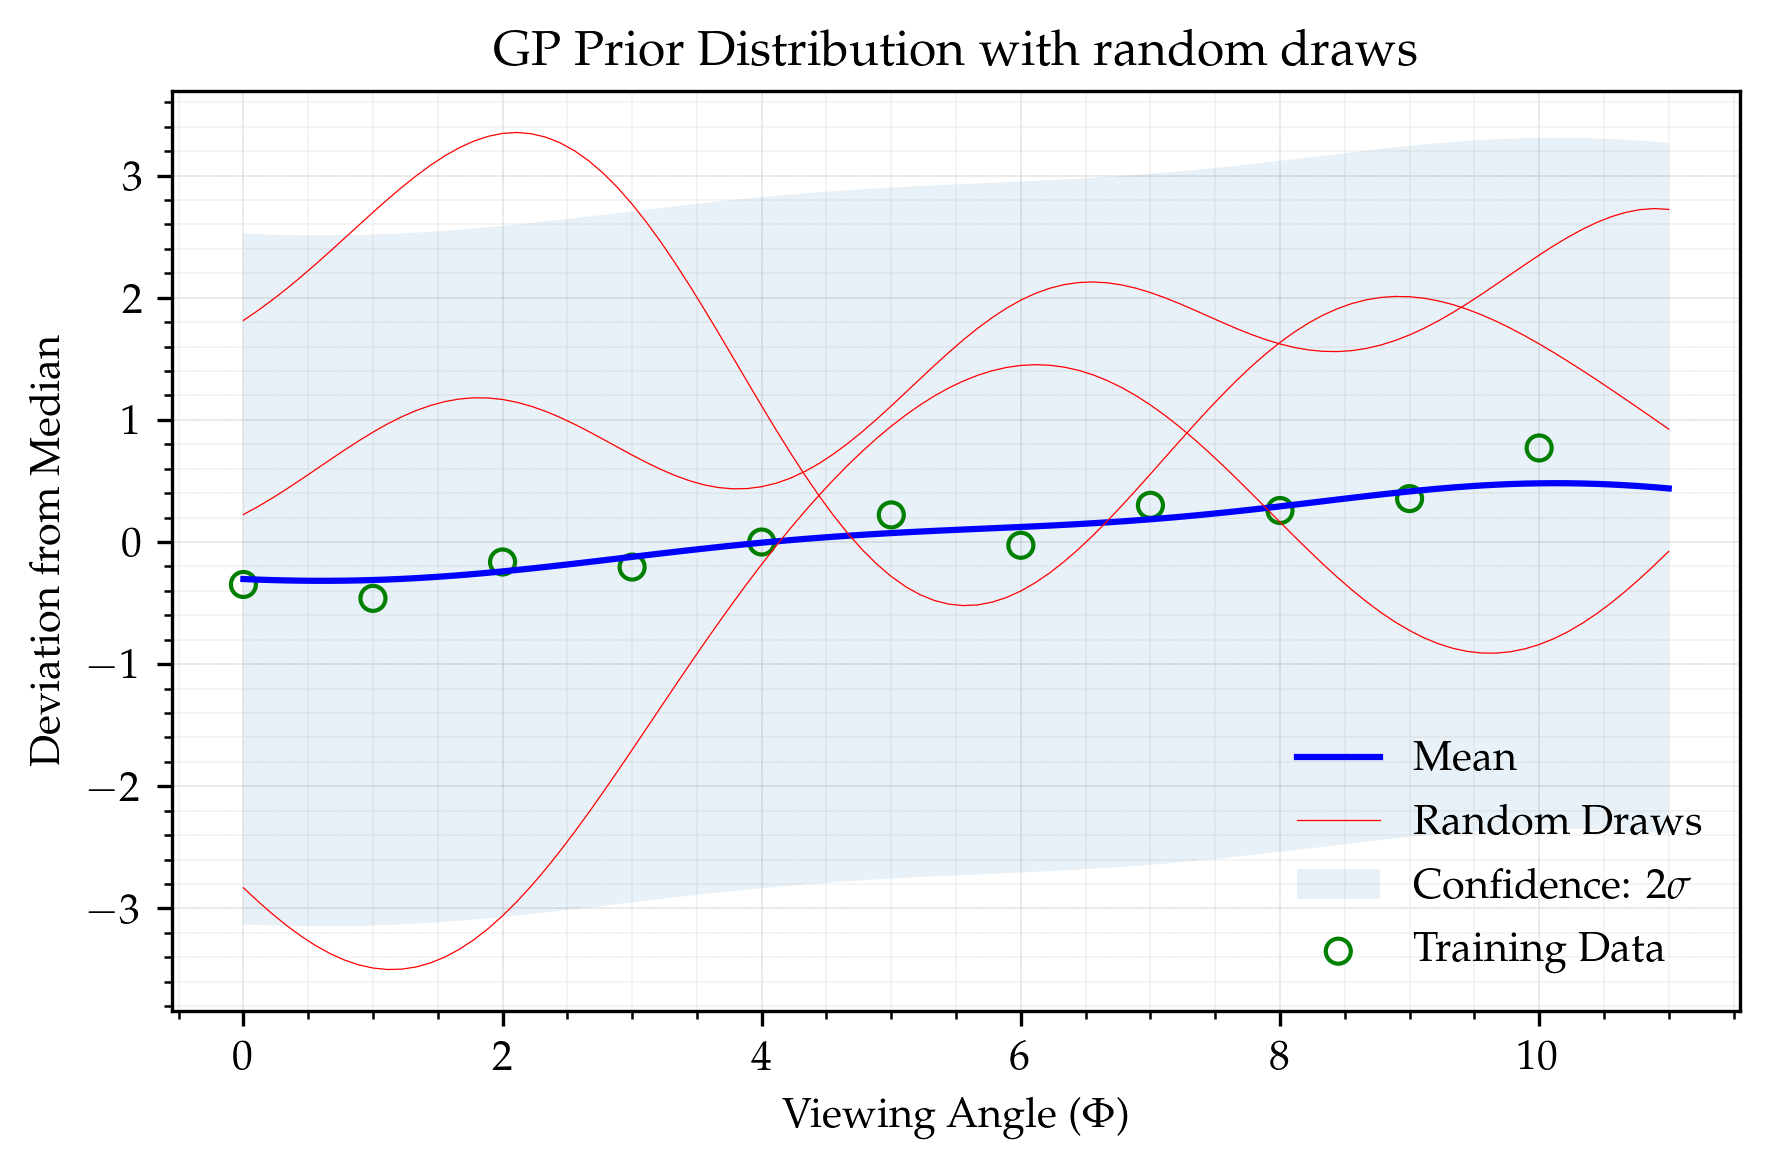

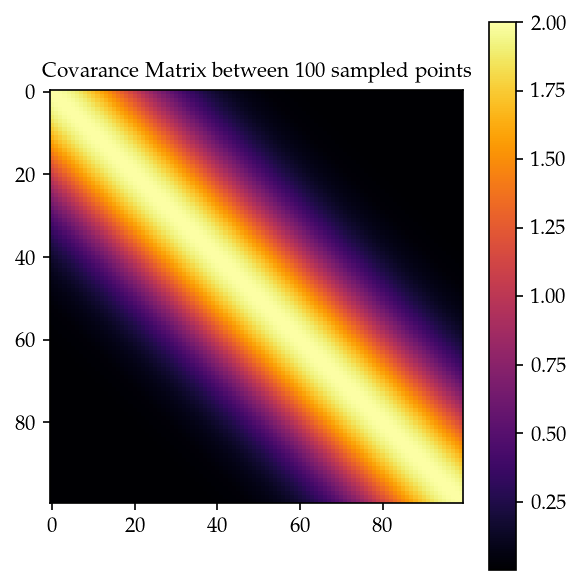

In [11]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# Manual
gp.plot_prior(manual = True, sig = 2)
gp.plot_covariance()
cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
plt.show()

In [12]:
gp.model_train(verbose = True)


Name : GP regression
Objective : -1.3297537698986739
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.5048741357115837  |      +ve      |        
  rbf.lengthscale          |    10.237731281822857  |      +ve      |        
  Gaussian_noise.variance  |  0.019581516431695353  |      +ve      |        


Are covariance matricies equal? True


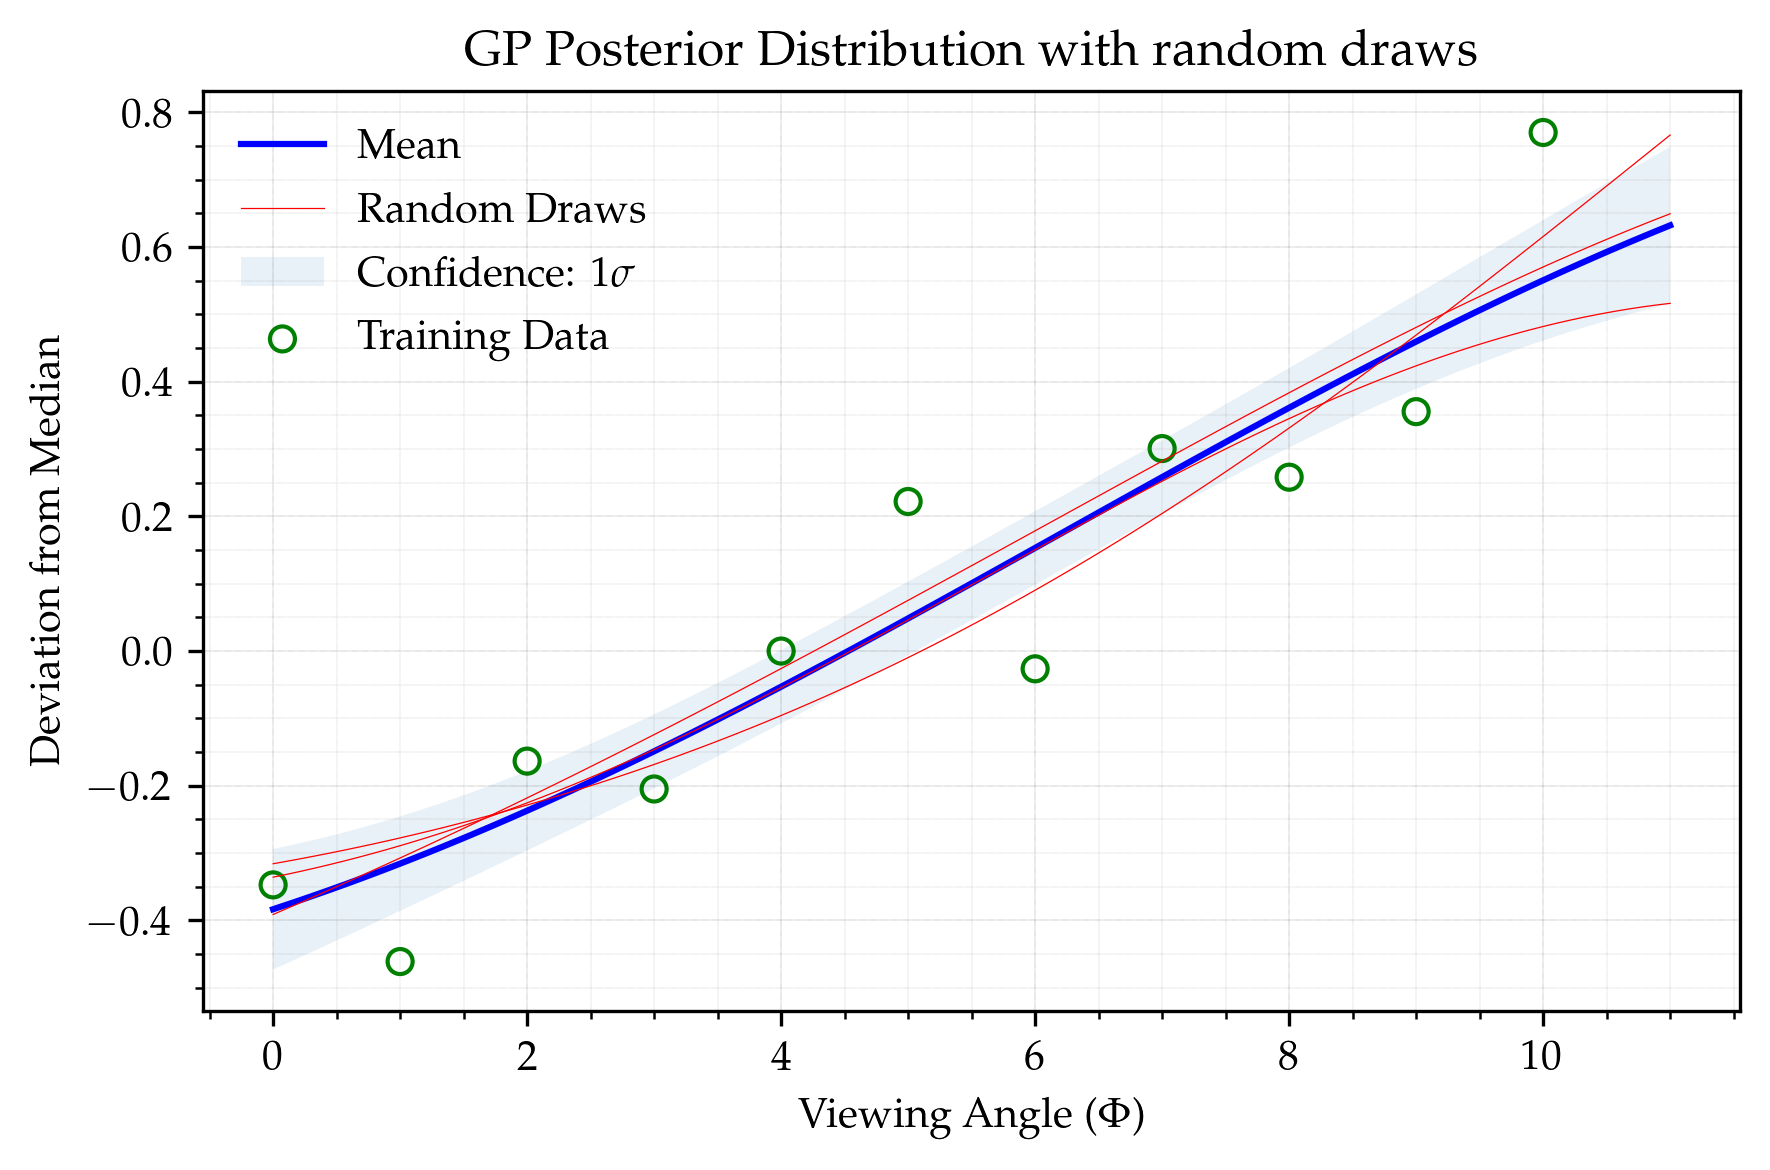

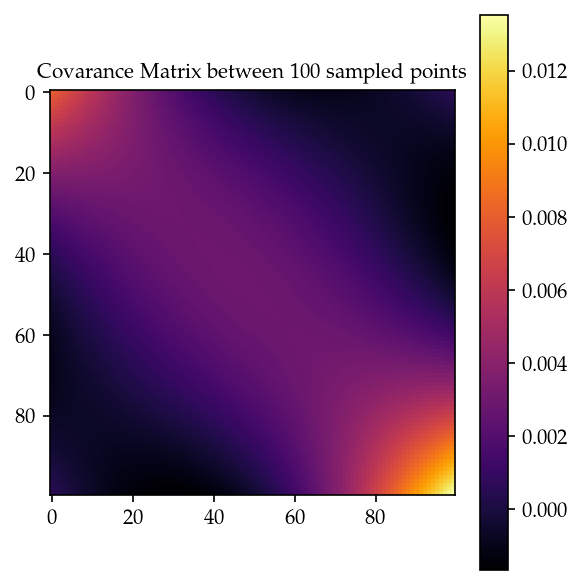

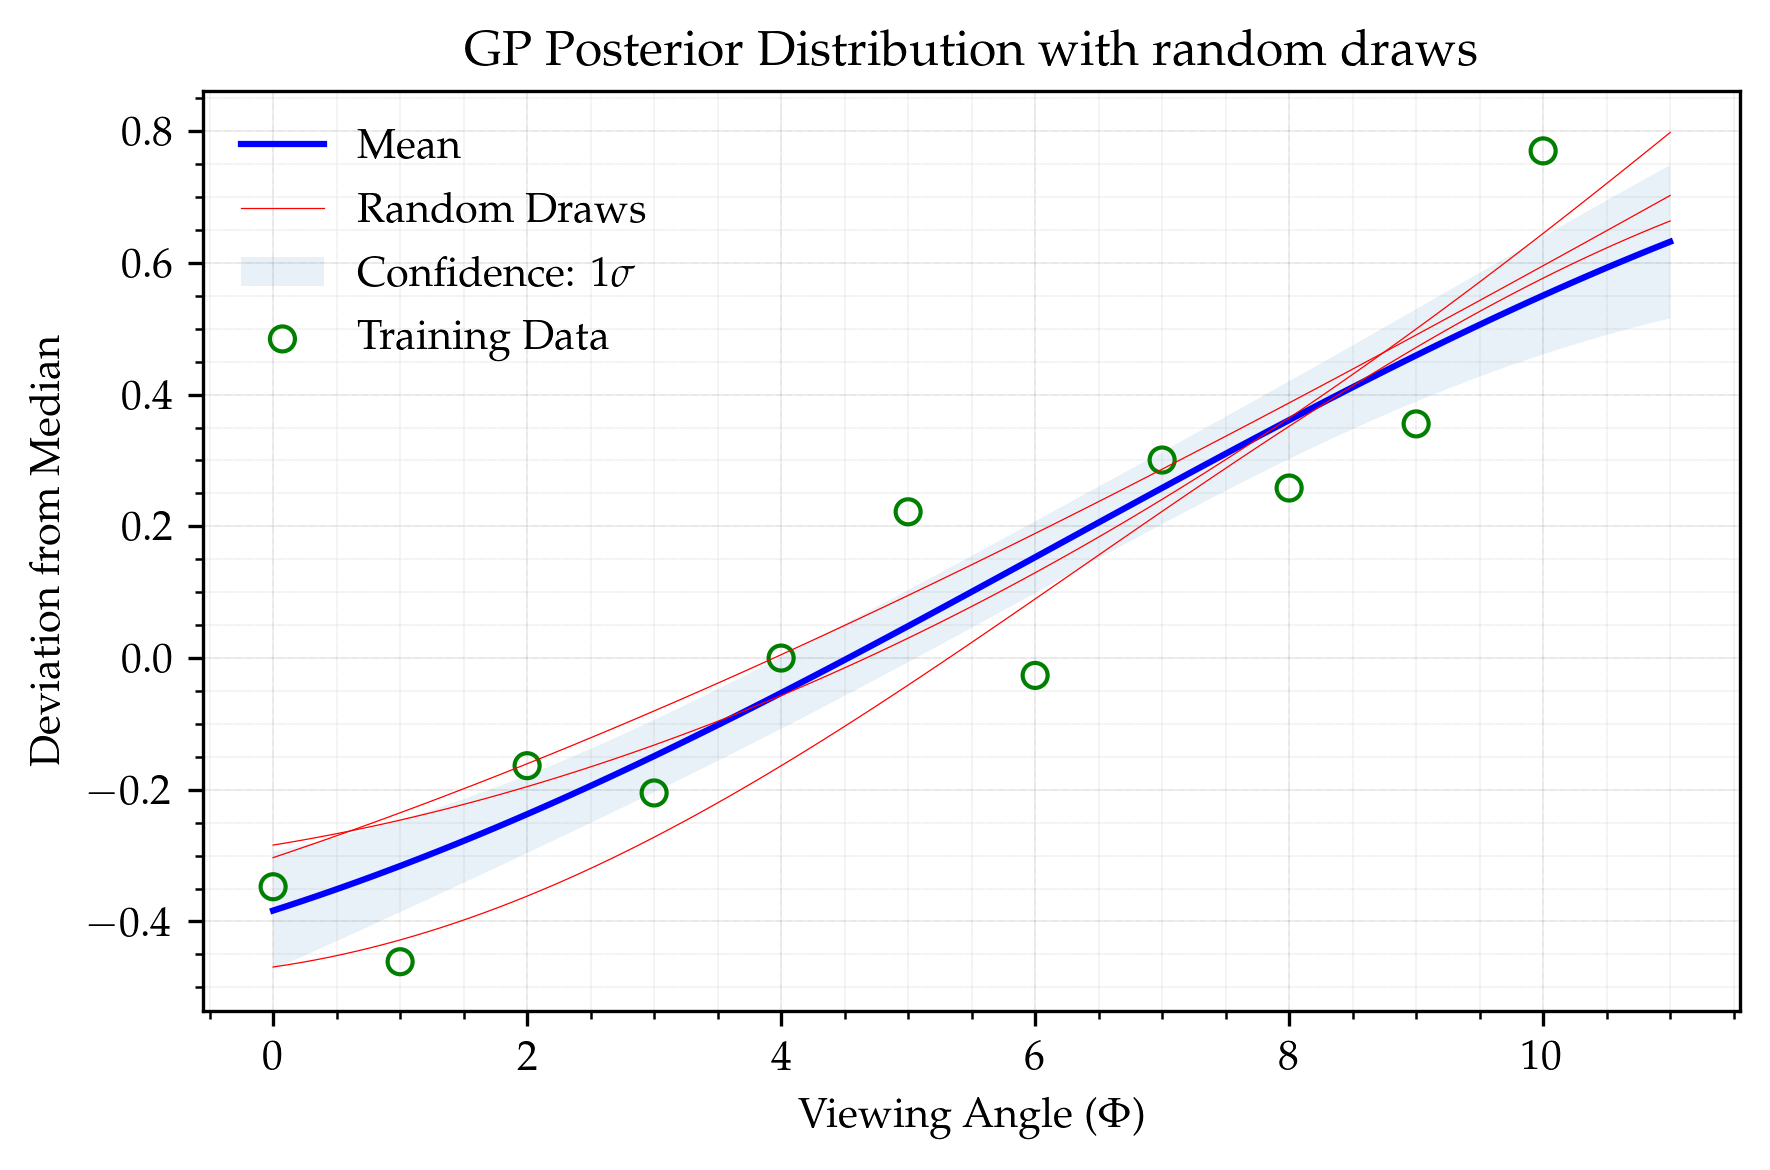

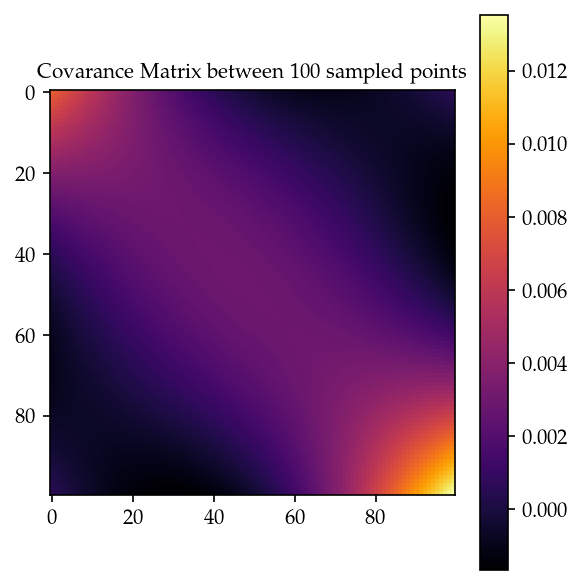

In [13]:
# Manual
gp.plot_posterior(manual = True)
gp.plot_covariance()
cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False)
gp.plot_covariance()
cov2 = gp.cov

# Comparison
print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
plt.show()

# Verification Scripting Below

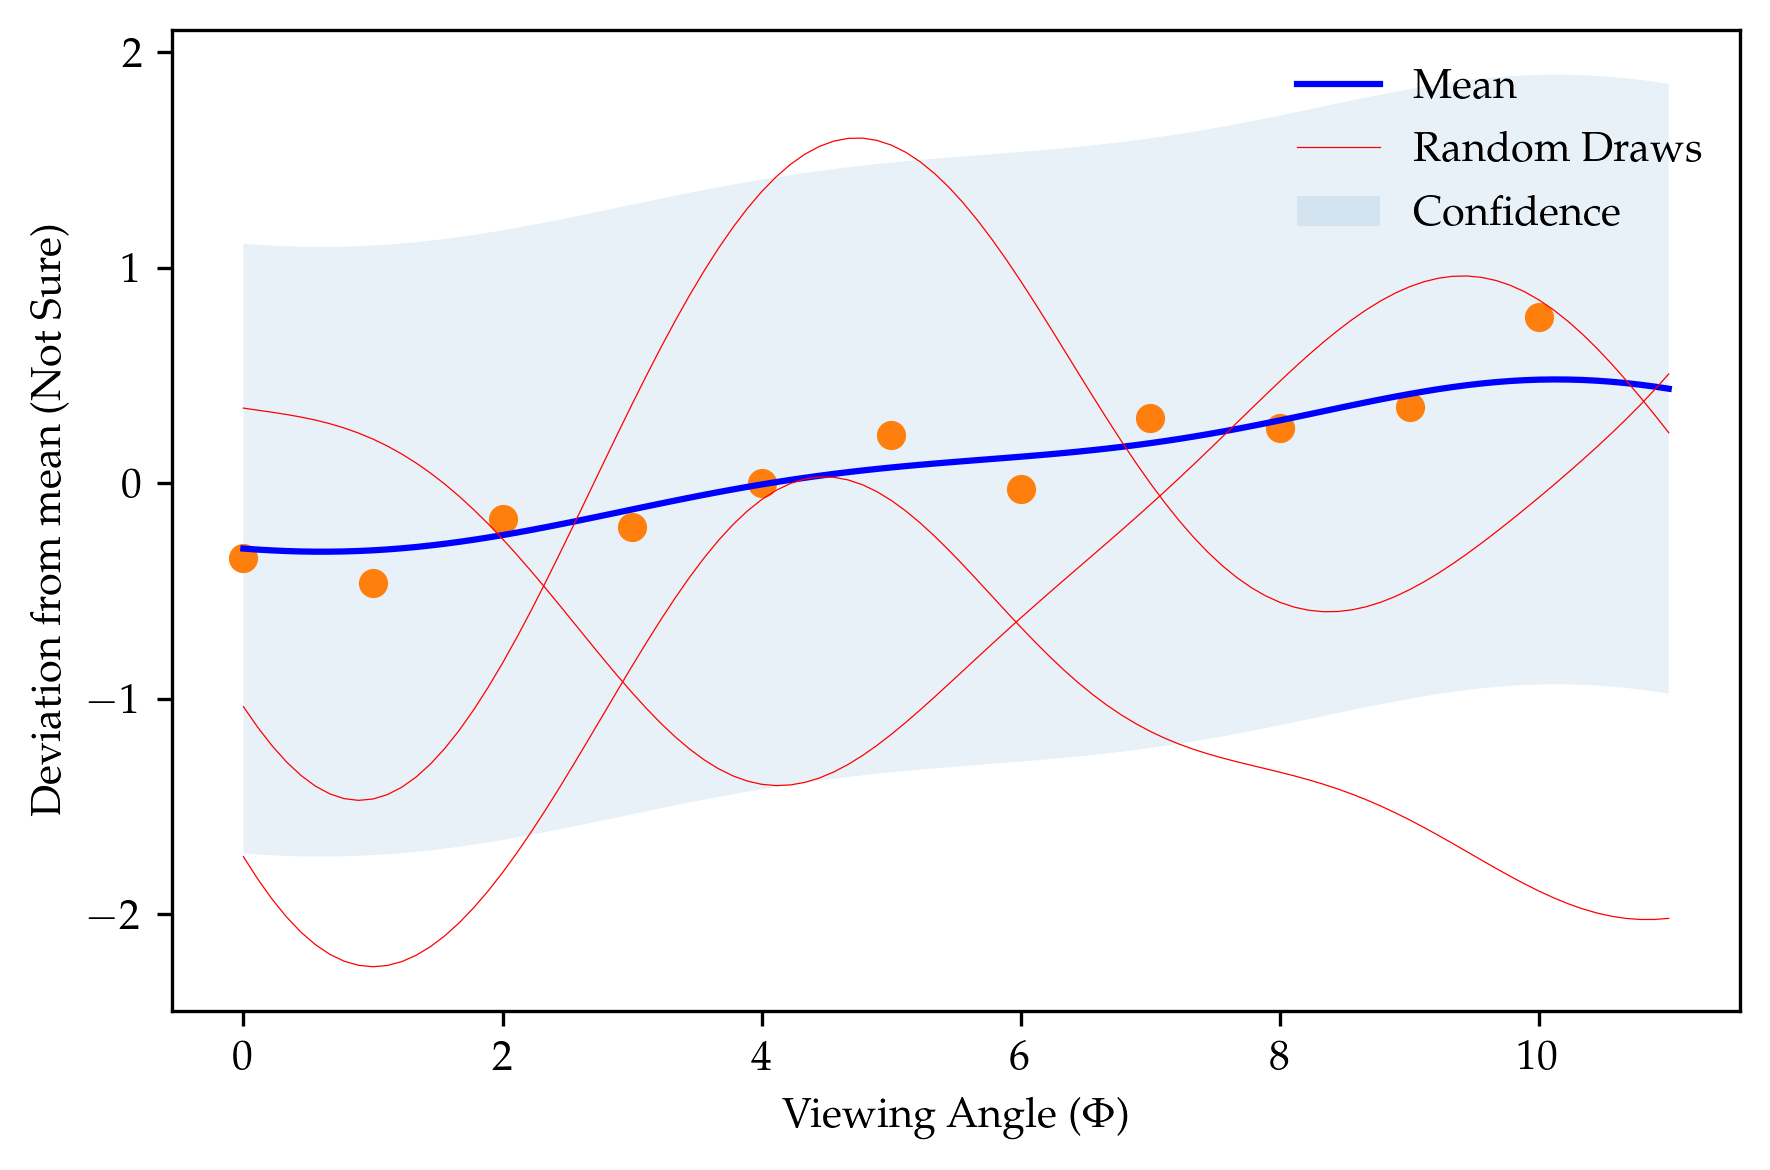

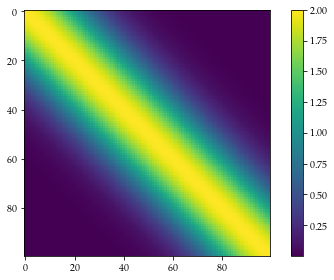

In [14]:
kernel = GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2)
model = GPy.models.GPRegression(gp.X, gp.Y, kernel)
N = 100

predX = np.linspace(0,gp.Nobs,N).reshape(N, 1)
plotX = predX.reshape(1, len(predX))[0]
cov = kernel.K(predX, predX)
var = np.diag(cov)

predY_mean, predY_cov = model.predict(predX,  full_cov=True)
mean_arr = predY_mean.reshape(1, len(predY_mean))[0]
plotY = mean_arr
F = np.random.multivariate_normal(mean_arr, cov, size = 3) # Why transpose? https://notebook.community/SheffieldML/notebook/lab_classes/gprs/GPy%20introduction%20covariance%20functions


plt.figure(dpi = 300)
n = 1
numVar = n * np.sqrt(var)

plt.fill_between(plotX, plotY + numVar, plotY - numVar, alpha = 0.1, label = "Confidence")
plt.plot(plotX, plotY, label = "Mean", color = "Blue")

plt.xlabel(r"Viewing Angle ($\Phi$)")
plt.ylabel("Deviation from mean (Not Sure)")
plt.plot(predX, F[0], color = "red", linewidth = 0.3, label = "Random Draws")
plt.plot(predX, F[1], color = "red", linewidth = 0.3)
plt.plot(predX, F[2], color = "red", linewidth = 0.3)
plt.scatter(gp.X, gp.Y)
plt.legend()

cov = kernel.K(predX)
plt.figure()
plt.imshow(cov, interpolation='None')
plt.colorbar()
plt.show()

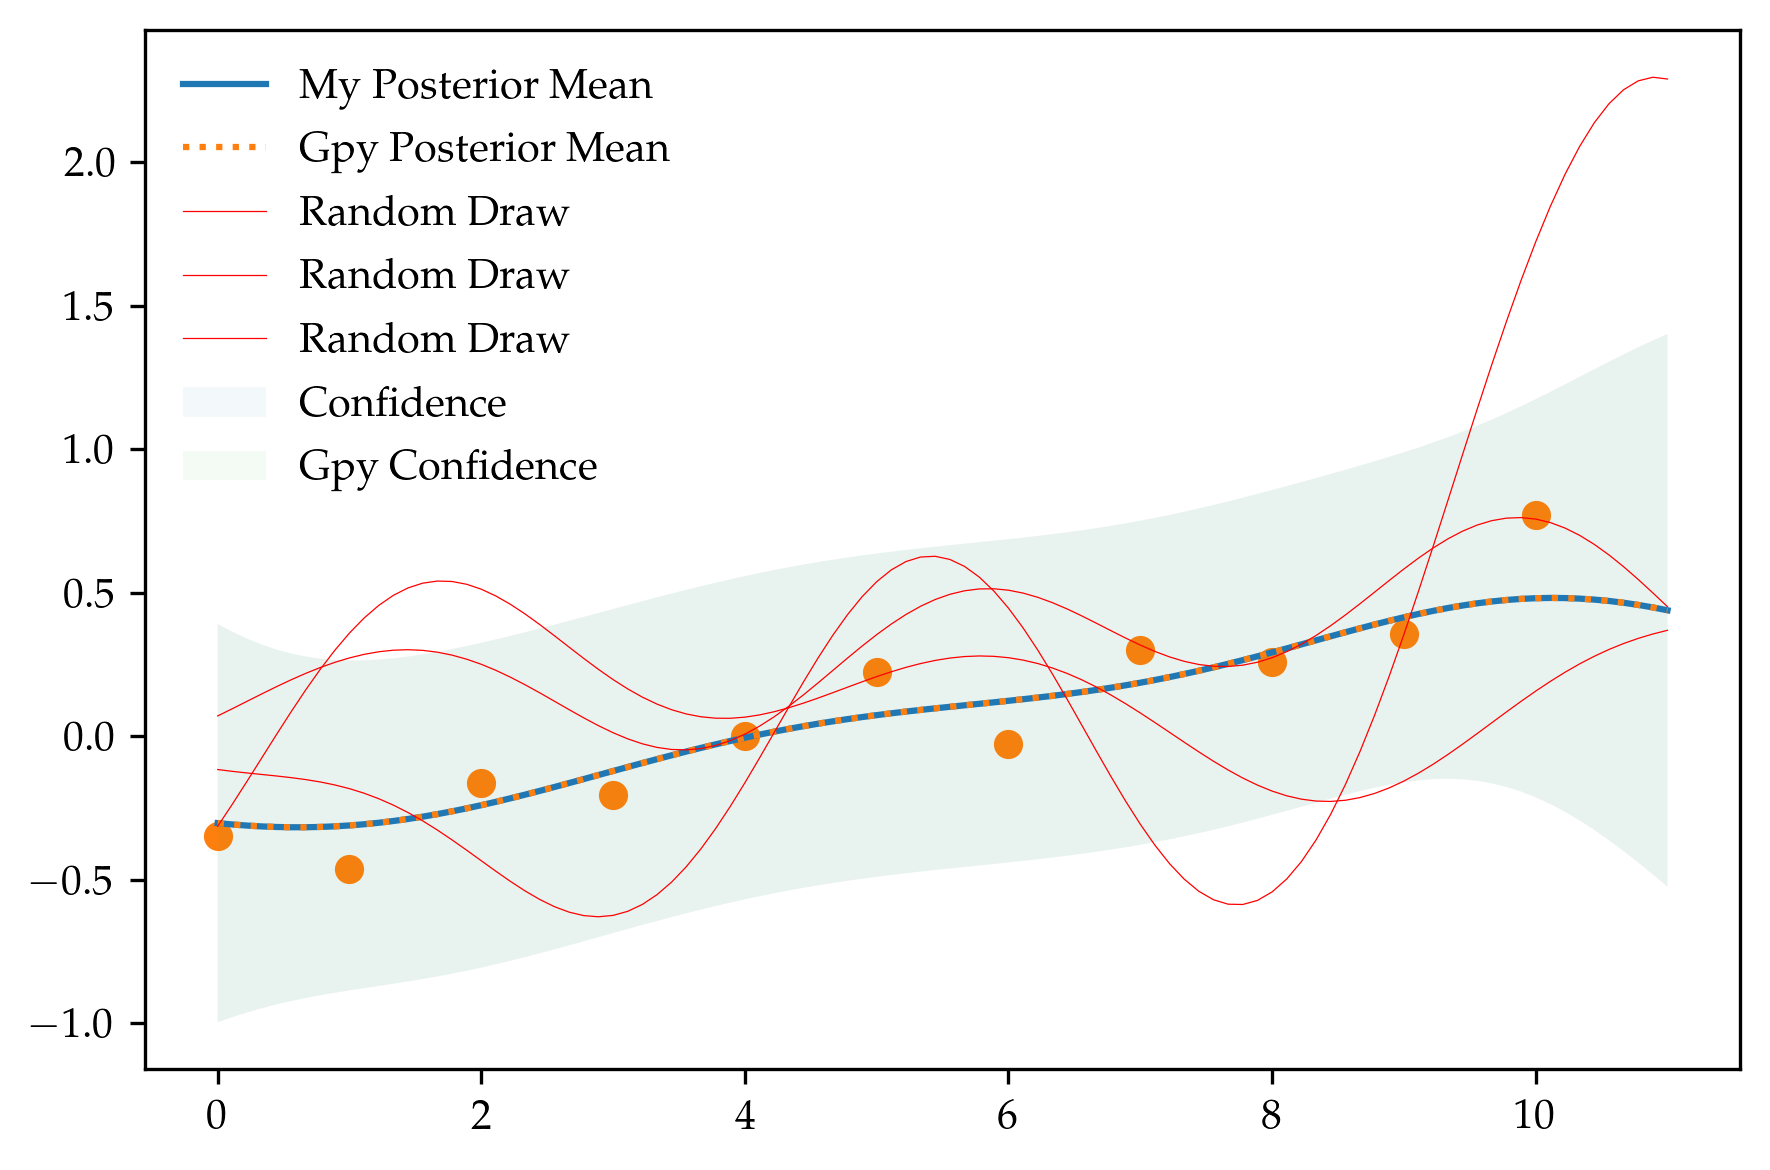

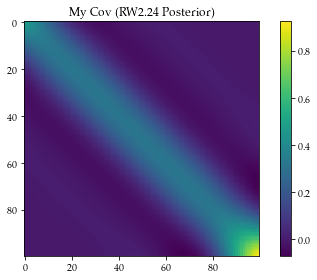

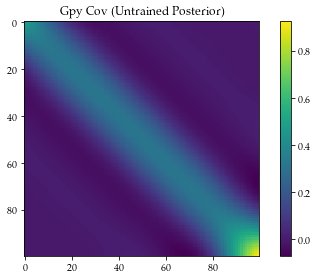

Are covariance matricies equal? True


In [15]:
trainX = gp.X

noise = 1
bracket = kernel.K(trainX, trainX) + noise*np.identity(len(trainX))
bracket_inv = np.linalg.inv(bracket)
A = kernel.K(predX, trainX)
B = bracket_inv
C = kernel.K(trainX, predX)
posterior_cov = kernel.K(predX, predX) - np.linalg.multi_dot([A,B,C])
posterior_mean = np.linalg.multi_dot([kernel.K(predX, trainX), bracket_inv, gp.Y])
posterior_mean = posterior_mean.reshape(1,len(posterior_mean))[0]
posterior_mean = np.array(posterior_mean, dtype=float)

Fstar = np.random.multivariate_normal(posterior_mean, posterior_cov, size = 3)

var = np.diag(posterior_cov)
plotX = predX.reshape(1, len(predX))[0]
plotY = posterior_mean

plt.figure(dpi = 300)
n = 1
numVar = n * np.sqrt(var)

plt.fill_between(plotX, plotY + numVar, plotY - numVar, alpha = 0.05, label = "Confidence")
        
plt.scatter(gp.X, gp.Y)
plt.plot(predX, posterior_mean, label = "My Posterior Mean")
plt.legend()

# plt.figure()
gpy_posterior_mean, gpy_cov = model.predict(predX, full_cov = True, include_likelihood = False) # True by default
# gpy_posterior_mean, gpy_cov = model.predict_noiseless(predX, full_cov = True) # True by default
plt.plot(predX, gpy_posterior_mean, label = "Gpy Posterior Mean", linestyle = "dotted")
plt.plot(predX, Fstar.T, color = 'red', label = "Random Draw", linewidth = 0.3) # I think this is correct. 
gpy_plotY = np.array(gpy_posterior_mean, dtype=float).T[0]
n = 1
gpy_numVar = n * np.sqrt(np.diag(gpy_cov))
plt.fill_between(plotX, gpy_plotY + gpy_numVar, gpy_plotY - gpy_numVar, alpha = 0.05, label = "Gpy Confidence")
plt.legend()

plt.figure()
plt.imshow(posterior_cov, interpolation='None')
plt.title("My Cov (RW2.24 Posterior)")
plt.colorbar()

plt.figure()
plt.imshow(gpy_cov, interpolation='None')
plt.title("Gpy Cov (Untrained Posterior)")
plt.colorbar()
plt.show()

print(f"Are covariance matricies equal? {np.allclose(posterior_cov, gpy_cov)}") #Only equal when noise = 1

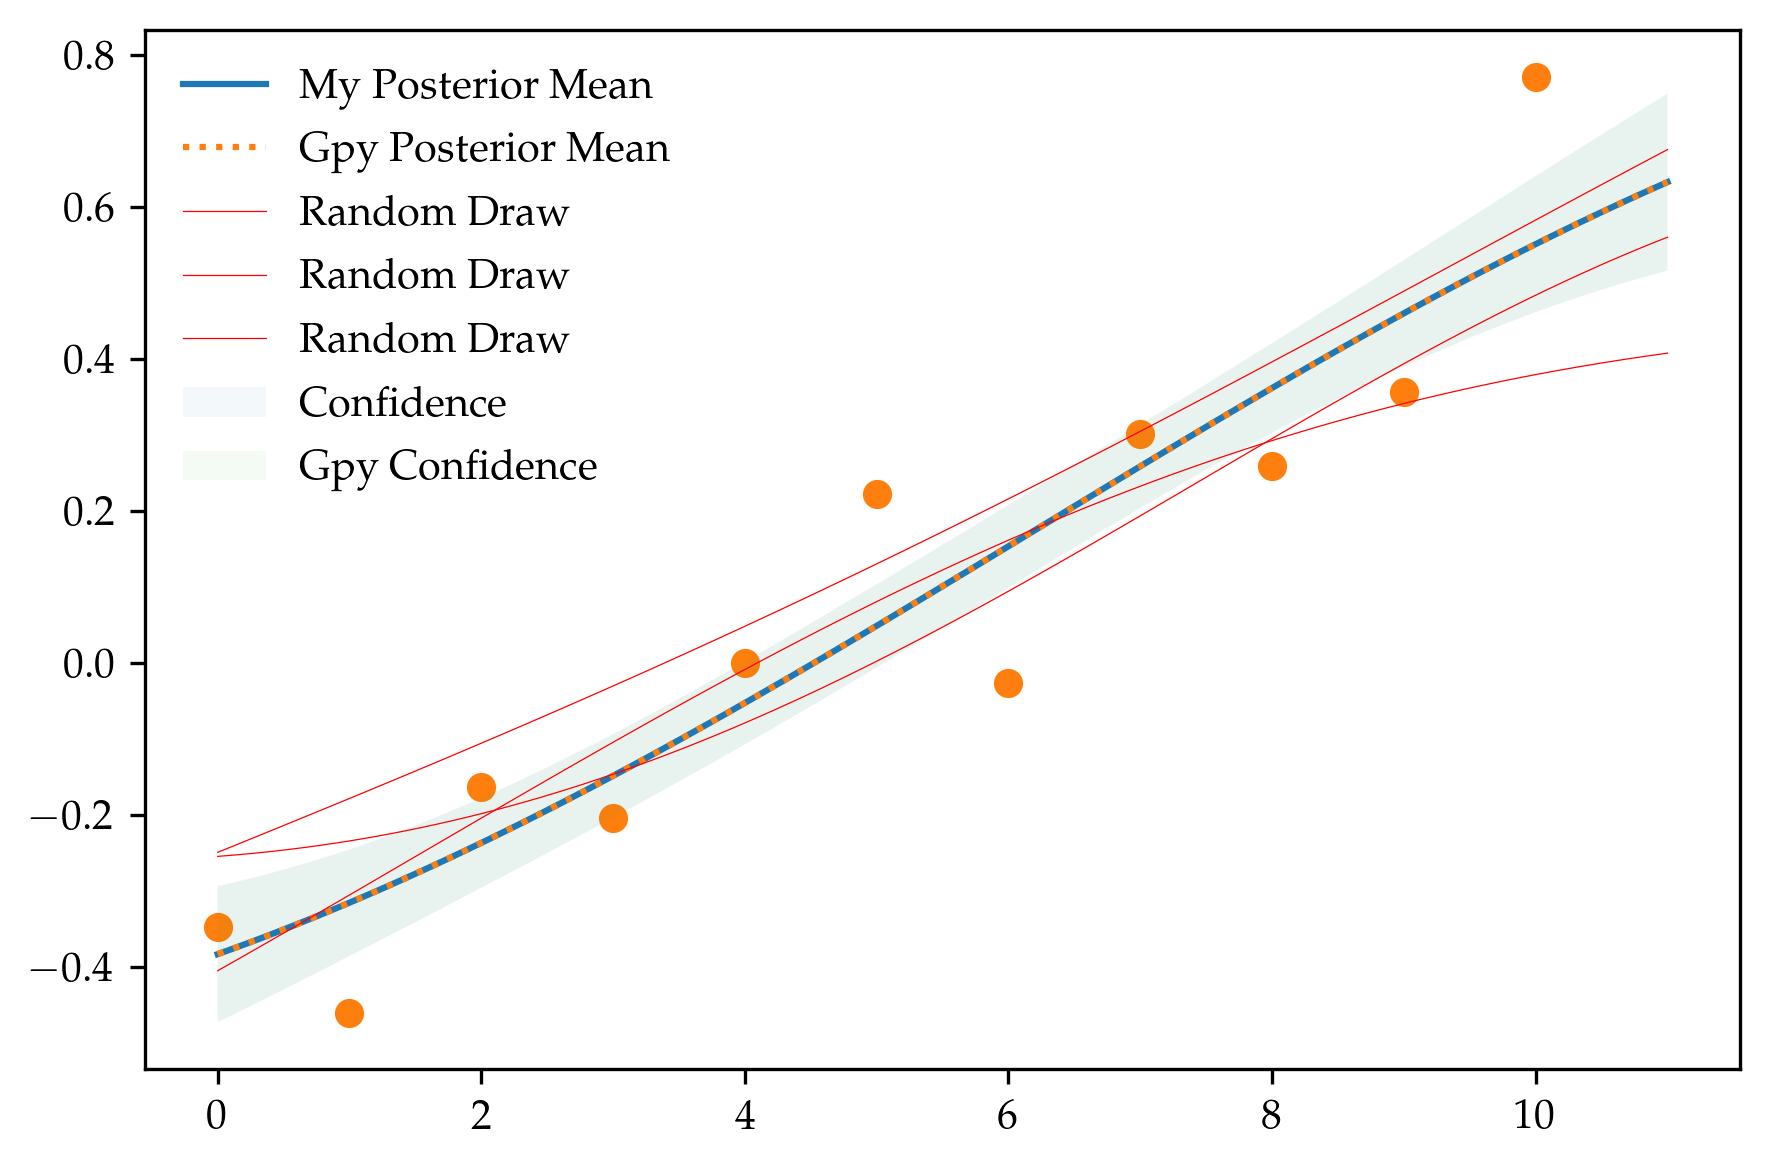

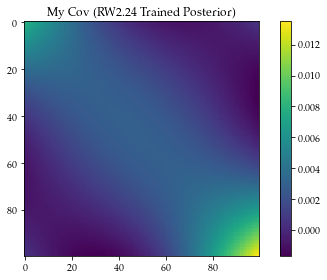

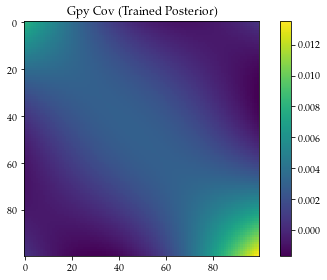

Are covariance matricies equal? True


In [16]:
model.optimize()
trainX = gp.X

noise = model.Gaussian_noise.variance
bracket = kernel.K(trainX, trainX) + noise*np.identity(len(trainX))
bracket_inv = np.linalg.inv(bracket)
A = kernel.K(predX, trainX)
B = bracket_inv
C = kernel.K(trainX, predX)
posterior_cov = kernel.K(predX, predX) - np.linalg.multi_dot([A,B,C])
posterior_mean = np.linalg.multi_dot([kernel.K(predX, trainX), bracket_inv, gp.Y])
posterior_mean = posterior_mean.reshape(1,len(posterior_mean))[0]
posterior_mean = np.array(posterior_mean, dtype=float)

Fstar = np.random.multivariate_normal(posterior_mean, posterior_cov, size = 3)

var = np.diag(posterior_cov)
plotX = predX.reshape(1, len(predX))[0]
plotY = posterior_mean

plt.figure(dpi = 300)
n = 1
numVar = n * np.sqrt(var)

plt.fill_between(plotX, plotY + numVar, plotY - numVar, alpha = 0.05, label = "Confidence")
        
plt.scatter(gp.X, gp.Y)
plt.plot(predX, posterior_mean, label = "My Posterior Mean")
plt.legend()

# plt.figure()
gpy_posterior_mean, gpy_cov = model.predict(predX, full_cov = True, include_likelihood = False) # True by default
# gpy_posterior_mean, gpy_cov = model.predict_noiseless(predX, full_cov = True) # True by default
plt.plot(predX, gpy_posterior_mean, label = "Gpy Posterior Mean", linestyle = "dotted")
plt.plot(predX, Fstar.T, color = 'red', label = "Random Draw", linewidth = 0.3) # I think this is correct. 
gpy_plotY = np.array(gpy_posterior_mean, dtype=float).T[0]
n = 1
gpy_numVar = n * np.sqrt(np.diag(gpy_cov))
plt.fill_between(plotX, gpy_plotY + gpy_numVar, gpy_plotY - gpy_numVar, alpha = 0.05, label = "Gpy Confidence")
plt.legend()

plt.figure()
plt.imshow(posterior_cov, interpolation='None')
plt.title("My Cov (RW2.24 Trained Posterior)")
plt.colorbar()

plt.figure()
plt.imshow(gpy_cov, interpolation='None')
plt.title("Gpy Cov (Trained Posterior)")
plt.colorbar()
plt.show()

print(f"Are covariance matricies equal? {np.allclose(posterior_cov, gpy_cov)}") #Only equal when noise = 1